In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [280]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0


In [281]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1 
    else: 
        return 0 

In [282]:
Output = df.apply(pin_update, axis=1)
df['Output'] = Output
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,9,1.0,0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,0.0,6.0,1.0,0.0,1.0,0.0,0.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3,1.0,1
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4,3.0,1
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,12,2.0,0


In [283]:
df1 = df[["Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Total Row Score A','Goslon Score A','Total Row Score C','Goslon Score C','Output']]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Total Row Score A,Goslon Score A,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1
H,9.0,0.0,0.0,0.0,6.0,23,2.0,0,1.0,1
H,9.0,0.0,0.0,0.0,6.0,21,2.0,8,1.0,0
H,0.0,0.0,0.0,0.0,2.0,10,1.0,9,1.0,0
H,9.0,0.0,1.0,0.0,6.0,25,2.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,23,2.0,3,1.0,1
Å,9.0,0.0,4.0,0.0,0.0,21,2.0,4,3.0,1
Å,12.0,0.0,0.0,0.0,6.0,25,3.0,12,2.0,0


In [284]:
x = np.array([df["Anteroposterior 1"], df["Anteroposterior 2"],df["Vertical 1"],df["Vertical 2"],df["Total Row Score A"],df["Total Row Score B"]]).T

y = np.array(df["Total Row Score C"]).T


In [285]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [286]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [287]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [288]:
#model.fit(x, y, epochs=150, batch_size=10)

In [289]:
target_column = "Output"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)


In [290]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)


In [292]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (92, 37)
y_train: (92,)
X_test: (31, 37)
y_test: (31,)


In [293]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(37,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train, y_train, epochs=1000)

In [295]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

1/1 [==============================] - 0s 62ms/step - loss: 0.0963 - accuracy: 0.9677
[0.09631107747554779, 0.9677419066429138]
Loss =  0.09631107747554779
Accuracy =  0.9677419066429138


In [309]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(92, 37)


In [296]:
predicted = basic_model.predict(X_test)


1/1 [==============================] - 0s 28ms/step


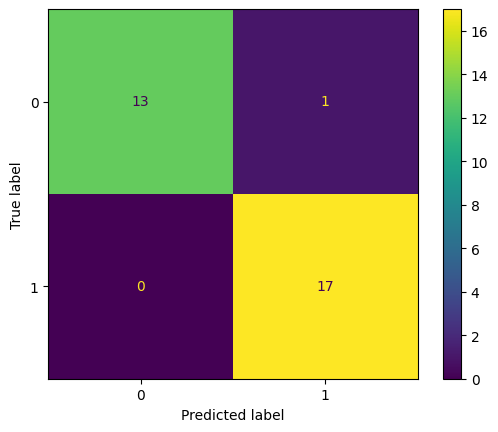

In [297]:
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [298]:
print(predicted)

[1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1]


In [299]:
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Total Row Score A,Goslon Score A,Total Row Score C,Goslon Score C,Output
Center,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,1
H,9.0,0.0,0.0,0.0,6.0,23,2.0,0,1.0,1
H,9.0,0.0,0.0,0.0,6.0,21,2.0,8,1.0,0
H,0.0,0.0,0.0,0.0,2.0,10,1.0,9,1.0,0
H,9.0,0.0,1.0,0.0,6.0,25,2.0,9,1.0,0
...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,23,2.0,3,1.0,1
Å,9.0,0.0,4.0,0.0,0.0,21,2.0,4,3.0,1
Å,12.0,0.0,0.0,0.0,6.0,25,3.0,12,2.0,0


In [300]:
target_column = "Output"
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_44793/3048013620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [301]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)


In [310]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)


(92, 9)
(92,)
(31, 9)
(31,)


In [337]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(9,)))
basic_model.add(Dense(16, activation='elu'))
basic_model.add(Dropout(0.9))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)



In [338]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train1, y_train1, epochs=150)


Epoch 1/150
3/3 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.5109
Epoch 2/150
3/3 [==============================] - 0s 1ms/step - loss: 1.2942 - accuracy: 0.4891
Epoch 3/150
3/3 [==============================] - 0s 1ms/step - loss: 0.9867 - accuracy: 0.4783
Epoch 4/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0295 - accuracy: 0.4565
Epoch 5/150
3/3 [==============================] - 0s 1ms/step - loss: 0.7901 - accuracy: 0.5761
Epoch 6/150
3/3 [==============================] - 0s 1ms/step - loss: 0.8258 - accuracy: 0.5326
Epoch 7/150
3/3 [==============================] - 0s 1ms/step - loss: 1.0296 - accuracy: 0.5326
Epoch 8/150
3/3 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5326
Epoch 9/150
3/3 [==============================] - 0s 1ms/step - loss: 0.8181 - accuracy: 0.5870
Epoch 10/150
3/3 [==============================] - 0s 2ms/step - loss: 0.9358 - accuracy: 0.5217
Epoch 11/150
3/3 [===========

In [345]:
loss_and_metrics1 = basic_model.evaluate(X_test1, y_test1)
print(loss_and_metrics1)
print('Loss = ',loss_and_metrics1[0])
print('Accuracy = ',loss_and_metrics1[1])

1/1 [==============================] - 0s 14ms/step - loss: 0.3013 - accuracy: 0.9355
[0.3012666404247284, 0.9354838728904724]
Loss =  0.3012666404247284
Accuracy =  0.9354838728904724


In [347]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE


lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)